# Method 1 — Standard Deviation:

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers.
Let’s see some code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(1)
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

-39.94710187872654


[85.55399476988208,
 -43.81318506366476,
 84.53847235591678,
 84.42953145411158,
 105.95481545611602,
 -42.63138395110833,
 -44.94355764593601,
 95.75573061038826,
 80.30307494776795,
 -41.143162282794165,
 -39.957398799997435,
 84.26856837424778,
 82.42697348072817,
 -43.184369344623185,
 -40.95890280930449,
 87.91101779312642,
 83.37447066344171,
 -44.44424222305315,
 92.27610780678935,
 84.03814761127374,
 -51.09256141208871,
 -46.09668078441848,
 -50.51365716306161,
 -48.50903892100658,
 82.6496737827011,
 -52.04830103603382,
 -52.51490933295892,
 80.63562421857625,
 -51.678464883316295,
 83.95951830576901,
 -51.19348409334086,
 -49.56285827754026,
 -45.4632085977629,
 -43.04180280261885,
 -44.9055004380818,
 -47.235261759383405,
 81.28789715326393,
 80.63820931291036,
 81.01017469617346,
 -56.54160642620779,
 83.27973264305392,
 82.40075276579245,
 -54.15799937107755,
 -43.67563319847029,
 88.00394022531218,
 -41.30471353215285,
 105.43178003058615,
 -40.71462249811915,
 -43.59675

The output of this code is a list of values above 80 and below -40. Notice that the dataset I am passing is a one-dimensional dataset. Now, let’s explore more advanced methods for multi-dimensional datasets.

# Method 2 — Boxplots

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous. Here is the code to plot a box plot:

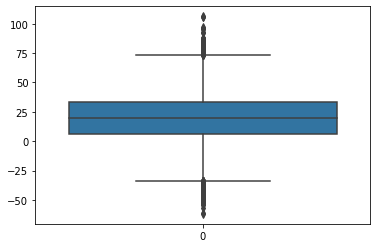

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)

The above code displays the plot below. As you can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.


#### Boxplot Anatomy:

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

# Method 3 — DBScan Clustering:

DBScan is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data. Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. In this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts. DBScan has three important concepts:

Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster.

Border Points are in the same cluster as core points but much further away from the centre of the cluster.

Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.

In [4]:
from sklearn.cluster import DBSCAN
random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

68

The output of the above code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

# Method 4 — Isolation Forest:

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.

This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. Since this article is focusing on the implementation rather than the know-how, I will not go any further on how the algorithm works. However, the full details on how it works are covered in this paper.

Now, let’s explore the code:

In [6]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

array([-1,  1, -1, ...,  1,  1,  1])

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier

# Method 5— Robust Random Cut Forest:

Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. It works by associating an anomaly score as well. Low score values indicate that the data point is considered “normal.” High values indicate the presence of an anomaly in the data. The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous. The details of the algorithm can be found in this paper.

The great thing about this algorithm is that it works with very high dimensional data. It can also work on real-time streaming data (built in AWS Kinesis Analytics) as well as offline data.

The paper shows some performance benchmarks when compared with Isolation Forest. Here are the results from the paper which shows that RCF is much more accurate and faster than Isolation Forests.